In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import librarys classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

# I. Load data

In [2]:
#Loading dataset
wine = pd.read_csv('redwine.csv')

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# II. Preprocessing Data for performing Machine learning algorithms

In [5]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (1, 3, 7, 10)
group_names = ['bad', 'average', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

<AxesSubplot:>

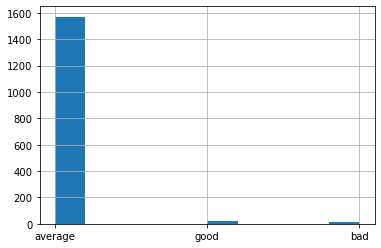

In [6]:
wine['quality'].hist()

In [7]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [8]:
#average: 0; good: 1; bad: 2
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine['quality'].value_counts()

0    1571
2      18
1      10
Name: quality, dtype: int64

In [10]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [11]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
print(X[:5])

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]


# III. Our training and testing data is ready now to perform machine learning algorithm

## A. With training dataset original

In [13]:
x_new = X

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 42)

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_accuracy_score = accuracy_score(y_test, y_pred)

In [16]:
print('\nAccuracy: ')
print(rf_accuracy_score)


Accuracy: 
0.9875


## B. With training dataset using PCA (Principal component analysis)

In [17]:
x = X
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

In [18]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x)

In [19]:
x_new.shape

(1599, 8)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 42)

In [21]:
rfPCA = RandomForestClassifier()
rfPCA.fit(x_train, y_train)
y_pred = rfPCA.predict(x_test)
rfPCA_conf_matrix = confusion_matrix(y_test, y_pred)
rfPCA_accuracy_score = accuracy_score(y_test, y_pred)

In [22]:
print('\nAccuracy: ')
print(rfPCA_accuracy_score)


Accuracy: 
0.9854166666666667
